In [1]:
#CIFAR
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import sys
import numpy as np
import torch.nn as nn
%matplotlib inline

In [2]:
print(sys.version)
print(torch.cuda.get_device_name(0))

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
GeForce GTX 1660


In [3]:
def data_loader(batch_size):
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize(平均, 偏差)

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size,
                                             shuffle=False, num_workers=2)


    return trainloader, testloader

In [4]:
class LinearNet(nn.Module):
    def __init__(self):
        super(LinearNet, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 1000)
        self.fc2 = nn.Linear(1000, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        
        return f.log_softmax(x, dim=1)

In [11]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = LinearNet().to(device)

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

In [14]:
batch_size = 64
train_loader, test_loader = data_loader(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [15]:
num_epochs = 20

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0
    
    net.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 3*32*32).to(device)
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        train_acc += (outputs.max(1)[1] == labels).sum().item()
        loss.backward()
        optimizer.step()
        
        if i % 10 == 0:
                print('Training log: {} epoch ({} / 60000 train. data). Loss: {}'.format(epoch+1, (i+1)*batch_size, loss.item()))
    
    avg_train_loss = train_loss / len(train_loader)
    avg_train_acc = train_acc / len(train_loader.dataset)
    
    net.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 3*32*32).to(device)
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.max(1)[1] == labels).sum().item()
            
    avg_val_loss = val_loss / len(test_loader)
    avg_val_acc = val_acc / len(test_loader.dataset)
    
    print('Test loss (avg): {}, Accuracy: {}'.format(avg_val_loss, avg_val_acc))
    
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)
    
            

Training log: 1 epoch (64 / 60000 train. data). Loss: 2.343085527420044
Training log: 1 epoch (704 / 60000 train. data). Loss: 2.2664434909820557
Training log: 1 epoch (1344 / 60000 train. data). Loss: 2.155883550643921
Training log: 1 epoch (1984 / 60000 train. data). Loss: 2.2007012367248535
Training log: 1 epoch (2624 / 60000 train. data). Loss: 2.120431423187256
Training log: 1 epoch (3264 / 60000 train. data). Loss: 2.134082317352295
Training log: 1 epoch (3904 / 60000 train. data). Loss: 2.1673357486724854
Training log: 1 epoch (4544 / 60000 train. data). Loss: 2.120565414428711
Training log: 1 epoch (5184 / 60000 train. data). Loss: 2.2198359966278076
Training log: 1 epoch (5824 / 60000 train. data). Loss: 2.0086278915405273
Training log: 1 epoch (6464 / 60000 train. data). Loss: 1.984784722328186
Training log: 1 epoch (7104 / 60000 train. data). Loss: 1.8617666959762573
Training log: 1 epoch (7744 / 60000 train. data). Loss: 1.879723072052002
Training log: 1 epoch (8384 / 60000

Training log: 2 epoch (18624 / 60000 train. data). Loss: 1.8465875387191772
Training log: 2 epoch (19264 / 60000 train. data). Loss: 1.9145270586013794
Training log: 2 epoch (19904 / 60000 train. data). Loss: 1.7582823038101196
Training log: 2 epoch (20544 / 60000 train. data). Loss: 1.837105393409729
Training log: 2 epoch (21184 / 60000 train. data). Loss: 1.9613507986068726
Training log: 2 epoch (21824 / 60000 train. data). Loss: 1.7205018997192383
Training log: 2 epoch (22464 / 60000 train. data). Loss: 1.746718406677246
Training log: 2 epoch (23104 / 60000 train. data). Loss: 1.8876994848251343
Training log: 2 epoch (23744 / 60000 train. data). Loss: 1.7648628950119019
Training log: 2 epoch (24384 / 60000 train. data). Loss: 1.8232636451721191
Training log: 2 epoch (25024 / 60000 train. data). Loss: 1.7491614818572998
Training log: 2 epoch (25664 / 60000 train. data). Loss: 1.8725497722625732
Training log: 2 epoch (26304 / 60000 train. data). Loss: 1.8275766372680664
Training log: 

Training log: 3 epoch (37824 / 60000 train. data). Loss: 1.8196851015090942
Training log: 3 epoch (38464 / 60000 train. data). Loss: 1.6093618869781494
Training log: 3 epoch (39104 / 60000 train. data). Loss: 1.567617416381836
Training log: 3 epoch (39744 / 60000 train. data). Loss: 1.8496512174606323
Training log: 3 epoch (40384 / 60000 train. data). Loss: 1.5464954376220703
Training log: 3 epoch (41024 / 60000 train. data). Loss: 1.6954432725906372
Training log: 3 epoch (41664 / 60000 train. data). Loss: 1.7764616012573242
Training log: 3 epoch (42304 / 60000 train. data). Loss: 1.7405341863632202
Training log: 3 epoch (42944 / 60000 train. data). Loss: 1.7049912214279175
Training log: 3 epoch (43584 / 60000 train. data). Loss: 1.7052879333496094
Training log: 3 epoch (44224 / 60000 train. data). Loss: 1.6022112369537354
Training log: 3 epoch (44864 / 60000 train. data). Loss: 1.8659143447875977
Training log: 3 epoch (45504 / 60000 train. data). Loss: 1.6728127002716064
Training log:

Training log: 5 epoch (5824 / 60000 train. data). Loss: 1.7982057332992554
Training log: 5 epoch (6464 / 60000 train. data). Loss: 1.6817119121551514
Training log: 5 epoch (7104 / 60000 train. data). Loss: 1.7458961009979248
Training log: 5 epoch (7744 / 60000 train. data). Loss: 1.860746145248413
Training log: 5 epoch (8384 / 60000 train. data). Loss: 1.7147928476333618
Training log: 5 epoch (9024 / 60000 train. data). Loss: 1.4697632789611816
Training log: 5 epoch (9664 / 60000 train. data). Loss: 1.7661733627319336
Training log: 5 epoch (10304 / 60000 train. data). Loss: 1.7400414943695068
Training log: 5 epoch (10944 / 60000 train. data). Loss: 1.8545955419540405
Training log: 5 epoch (11584 / 60000 train. data). Loss: 1.5662832260131836
Training log: 5 epoch (12224 / 60000 train. data). Loss: 1.833535075187683
Training log: 5 epoch (12864 / 60000 train. data). Loss: 1.39066743850708
Training log: 5 epoch (13504 / 60000 train. data). Loss: 1.599547266960144
Training log: 5 epoch (1

Training log: 6 epoch (25024 / 60000 train. data). Loss: 1.5561188459396362
Training log: 6 epoch (25664 / 60000 train. data). Loss: 1.4517592191696167
Training log: 6 epoch (26304 / 60000 train. data). Loss: 1.707542061805725
Training log: 6 epoch (26944 / 60000 train. data). Loss: 1.6477528810501099
Training log: 6 epoch (27584 / 60000 train. data). Loss: 1.6823458671569824
Training log: 6 epoch (28224 / 60000 train. data). Loss: 1.5097357034683228
Training log: 6 epoch (28864 / 60000 train. data). Loss: 1.7205119132995605
Training log: 6 epoch (29504 / 60000 train. data). Loss: 1.5401688814163208
Training log: 6 epoch (30144 / 60000 train. data). Loss: 1.9168202877044678
Training log: 6 epoch (30784 / 60000 train. data). Loss: 1.952653169631958
Training log: 6 epoch (31424 / 60000 train. data). Loss: 1.5729756355285645
Training log: 6 epoch (32064 / 60000 train. data). Loss: 1.6491329669952393
Training log: 6 epoch (32704 / 60000 train. data). Loss: 1.5413432121276855
Training log: 

Training log: 7 epoch (43584 / 60000 train. data). Loss: 1.647953987121582
Training log: 7 epoch (44224 / 60000 train. data). Loss: 1.7242974042892456
Training log: 7 epoch (44864 / 60000 train. data). Loss: 1.6877551078796387
Training log: 7 epoch (45504 / 60000 train. data). Loss: 1.7250055074691772
Training log: 7 epoch (46144 / 60000 train. data). Loss: 1.7385778427124023
Training log: 7 epoch (46784 / 60000 train. data). Loss: 1.575919270515442
Training log: 7 epoch (47424 / 60000 train. data). Loss: 1.746803641319275
Training log: 7 epoch (48064 / 60000 train. data). Loss: 1.7173906564712524
Training log: 7 epoch (48704 / 60000 train. data). Loss: 1.4109716415405273
Training log: 7 epoch (49344 / 60000 train. data). Loss: 1.4582867622375488
Training log: 7 epoch (49984 / 60000 train. data). Loss: 1.5446367263793945
Test loss (avg): 1.6210983482895382, Accuracy: 0.4403
Training log: 8 epoch (64 / 60000 train. data). Loss: 1.48987877368927
Training log: 8 epoch (704 / 60000 train. 

Training log: 9 epoch (12224 / 60000 train. data). Loss: 1.4191097021102905
Training log: 9 epoch (12864 / 60000 train. data). Loss: 1.348122477531433
Training log: 9 epoch (13504 / 60000 train. data). Loss: 1.70465886592865
Training log: 9 epoch (14144 / 60000 train. data). Loss: 1.5627206563949585
Training log: 9 epoch (14784 / 60000 train. data). Loss: 1.4546242952346802
Training log: 9 epoch (15424 / 60000 train. data). Loss: 1.4105706214904785
Training log: 9 epoch (16064 / 60000 train. data). Loss: 1.6496328115463257
Training log: 9 epoch (16704 / 60000 train. data). Loss: 1.5371664762496948
Training log: 9 epoch (17344 / 60000 train. data). Loss: 1.4413923025131226
Training log: 9 epoch (17984 / 60000 train. data). Loss: 1.3958059549331665
Training log: 9 epoch (18624 / 60000 train. data). Loss: 1.3907883167266846
Training log: 9 epoch (19264 / 60000 train. data). Loss: 1.4350438117980957
Training log: 9 epoch (19904 / 60000 train. data). Loss: 1.3854392766952515
Training log: 9

Training log: 10 epoch (32064 / 60000 train. data). Loss: 1.5816302299499512
Training log: 10 epoch (32704 / 60000 train. data). Loss: 1.4248048067092896
Training log: 10 epoch (33344 / 60000 train. data). Loss: 1.4809116125106812
Training log: 10 epoch (33984 / 60000 train. data). Loss: 1.630377173423767
Training log: 10 epoch (34624 / 60000 train. data). Loss: 1.6003516912460327
Training log: 10 epoch (35264 / 60000 train. data). Loss: 1.5445939302444458
Training log: 10 epoch (35904 / 60000 train. data). Loss: 1.5442038774490356
Training log: 10 epoch (36544 / 60000 train. data). Loss: 1.4276968240737915
Training log: 10 epoch (37184 / 60000 train. data). Loss: 1.5097804069519043
Training log: 10 epoch (37824 / 60000 train. data). Loss: 1.6219992637634277
Training log: 10 epoch (38464 / 60000 train. data). Loss: 1.6089457273483276
Training log: 10 epoch (39104 / 60000 train. data). Loss: 1.4481908082962036
Training log: 10 epoch (39744 / 60000 train. data). Loss: 1.3050100803375244


Test loss (avg): 1.5727734011449632, Accuracy: 0.4593
Training log: 12 epoch (64 / 60000 train. data). Loss: 1.9524587392807007
Training log: 12 epoch (704 / 60000 train. data). Loss: 1.4161707162857056
Training log: 12 epoch (1344 / 60000 train. data). Loss: 1.460782766342163
Training log: 12 epoch (1984 / 60000 train. data). Loss: 1.4335306882858276
Training log: 12 epoch (2624 / 60000 train. data). Loss: 1.3335578441619873
Training log: 12 epoch (3264 / 60000 train. data). Loss: 1.4093763828277588
Training log: 12 epoch (3904 / 60000 train. data). Loss: 1.6243489980697632
Training log: 12 epoch (4544 / 60000 train. data). Loss: 1.4155032634735107
Training log: 12 epoch (5184 / 60000 train. data). Loss: 1.3634988069534302
Training log: 12 epoch (5824 / 60000 train. data). Loss: 1.3188453912734985
Training log: 12 epoch (6464 / 60000 train. data). Loss: 1.6646666526794434
Training log: 12 epoch (7104 / 60000 train. data). Loss: 1.4809291362762451
Training log: 12 epoch (7744 / 60000 t

Training log: 13 epoch (18624 / 60000 train. data). Loss: 1.4635801315307617
Training log: 13 epoch (19264 / 60000 train. data). Loss: 1.3528951406478882
Training log: 13 epoch (19904 / 60000 train. data). Loss: 1.407533049583435
Training log: 13 epoch (20544 / 60000 train. data). Loss: 1.0759882926940918
Training log: 13 epoch (21184 / 60000 train. data). Loss: 1.3077590465545654
Training log: 13 epoch (21824 / 60000 train. data). Loss: 1.408801794052124
Training log: 13 epoch (22464 / 60000 train. data). Loss: 1.116182565689087
Training log: 13 epoch (23104 / 60000 train. data). Loss: 1.5863953828811646
Training log: 13 epoch (23744 / 60000 train. data). Loss: 1.250091791152954
Training log: 13 epoch (24384 / 60000 train. data). Loss: 1.5031683444976807
Training log: 13 epoch (25024 / 60000 train. data). Loss: 1.150505781173706
Training log: 13 epoch (25664 / 60000 train. data). Loss: 1.447898268699646
Training log: 13 epoch (26304 / 60000 train. data). Loss: 1.4472928047180176
Train

Training log: 14 epoch (38464 / 60000 train. data). Loss: 1.4578726291656494
Training log: 14 epoch (39104 / 60000 train. data). Loss: 1.3553924560546875
Training log: 14 epoch (39744 / 60000 train. data). Loss: 1.6668078899383545
Training log: 14 epoch (40384 / 60000 train. data). Loss: 1.5615439414978027
Training log: 14 epoch (41024 / 60000 train. data). Loss: 1.2956291437149048
Training log: 14 epoch (41664 / 60000 train. data). Loss: 1.451356053352356
Training log: 14 epoch (42304 / 60000 train. data). Loss: 1.3776627779006958
Training log: 14 epoch (42944 / 60000 train. data). Loss: 1.6569234132766724
Training log: 14 epoch (43584 / 60000 train. data). Loss: 1.375567078590393
Training log: 14 epoch (44224 / 60000 train. data). Loss: 1.2444674968719482
Training log: 14 epoch (44864 / 60000 train. data). Loss: 1.390974521636963
Training log: 14 epoch (45504 / 60000 train. data). Loss: 1.5835117101669312
Training log: 14 epoch (46144 / 60000 train. data). Loss: 1.284099817276001
Tra

Training log: 16 epoch (5824 / 60000 train. data). Loss: 1.2138855457305908
Training log: 16 epoch (6464 / 60000 train. data). Loss: 1.310174822807312
Training log: 16 epoch (7104 / 60000 train. data). Loss: 1.1059696674346924
Training log: 16 epoch (7744 / 60000 train. data). Loss: 1.2804168462753296
Training log: 16 epoch (8384 / 60000 train. data). Loss: 1.5858237743377686
Training log: 16 epoch (9024 / 60000 train. data). Loss: 1.302053451538086
Training log: 16 epoch (9664 / 60000 train. data). Loss: 1.4017529487609863
Training log: 16 epoch (10304 / 60000 train. data). Loss: 1.1831177473068237
Training log: 16 epoch (10944 / 60000 train. data). Loss: 1.2163852453231812
Training log: 16 epoch (11584 / 60000 train. data). Loss: 1.3761608600616455
Training log: 16 epoch (12224 / 60000 train. data). Loss: 1.5701524019241333
Training log: 16 epoch (12864 / 60000 train. data). Loss: 1.047572374343872
Training log: 16 epoch (13504 / 60000 train. data). Loss: 1.269863247871399
Training l

Training log: 17 epoch (23104 / 60000 train. data). Loss: 1.2679563760757446
Training log: 17 epoch (23744 / 60000 train. data). Loss: 1.2760531902313232
Training log: 17 epoch (24384 / 60000 train. data). Loss: 1.4256821870803833
Training log: 17 epoch (25024 / 60000 train. data). Loss: 1.3447856903076172
Training log: 17 epoch (25664 / 60000 train. data). Loss: 1.3406720161437988
Training log: 17 epoch (26304 / 60000 train. data). Loss: 1.6474888324737549
Training log: 17 epoch (26944 / 60000 train. data). Loss: 1.2300524711608887
Training log: 17 epoch (27584 / 60000 train. data). Loss: 1.3244091272354126
Training log: 17 epoch (28224 / 60000 train. data). Loss: 1.170741081237793
Training log: 17 epoch (28864 / 60000 train. data). Loss: 1.4002536535263062
Training log: 17 epoch (29504 / 60000 train. data). Loss: 1.208756685256958
Training log: 17 epoch (30144 / 60000 train. data). Loss: 1.3632540702819824
Training log: 17 epoch (30784 / 60000 train. data). Loss: 1.4622819423675537
T

Training log: 18 epoch (41024 / 60000 train. data). Loss: 1.3224022388458252
Training log: 18 epoch (41664 / 60000 train. data). Loss: 1.3017326593399048
Training log: 18 epoch (42304 / 60000 train. data). Loss: 1.2670273780822754
Training log: 18 epoch (42944 / 60000 train. data). Loss: 1.1980571746826172
Training log: 18 epoch (43584 / 60000 train. data). Loss: 1.5463451147079468
Training log: 18 epoch (44224 / 60000 train. data). Loss: 1.1417748928070068
Training log: 18 epoch (44864 / 60000 train. data). Loss: 1.3168379068374634
Training log: 18 epoch (45504 / 60000 train. data). Loss: 1.53428316116333
Training log: 18 epoch (46144 / 60000 train. data). Loss: 1.090967059135437
Training log: 18 epoch (46784 / 60000 train. data). Loss: 1.406651496887207
Training log: 18 epoch (47424 / 60000 train. data). Loss: 1.3354530334472656
Training log: 18 epoch (48064 / 60000 train. data). Loss: 1.5125395059585571
Training log: 18 epoch (48704 / 60000 train. data). Loss: 1.1911253929138184
Tra

Training log: 20 epoch (9024 / 60000 train. data). Loss: 1.1837414503097534
Training log: 20 epoch (9664 / 60000 train. data). Loss: 1.2619192600250244
Training log: 20 epoch (10304 / 60000 train. data). Loss: 1.3458259105682373
Training log: 20 epoch (10944 / 60000 train. data). Loss: 1.2636770009994507
Training log: 20 epoch (11584 / 60000 train. data). Loss: 1.495055079460144
Training log: 20 epoch (12224 / 60000 train. data). Loss: 1.1803152561187744
Training log: 20 epoch (12864 / 60000 train. data). Loss: 1.350661277770996
Training log: 20 epoch (13504 / 60000 train. data). Loss: 1.525702953338623
Training log: 20 epoch (14144 / 60000 train. data). Loss: 0.9943737387657166
Training log: 20 epoch (14784 / 60000 train. data). Loss: 1.2564873695373535
Training log: 20 epoch (15424 / 60000 train. data). Loss: 1.3450700044631958
Training log: 20 epoch (16064 / 60000 train. data). Loss: 1.4644629955291748
Training log: 20 epoch (16704 / 60000 train. data). Loss: 1.5931963920593262
Trai

20
[0.3644, 0.3653, 0.3828, 0.4001, 0.3911, 0.4134, 0.4403, 0.4282, 0.4546, 0.4619, 0.4593, 0.46, 0.4595, 0.461, 0.4734, 0.4896, 0.4823, 0.4744, 0.484, 0.4812]
[1.9186365654706345, 1.7977016208421848, 1.748704845795546, 1.7126100856020017, 1.6710413342241741, 1.630115689371553, 1.600355274994355, 1.5694480568856535, 1.5337557144787, 1.5103644271335943, 1.4773764143819395, 1.4546486227713582, 1.4234473662608116, 1.4025335049690189, 1.3782090677324768, 1.3501522852026897, 1.3240302757686362, 1.3048373933338449, 1.28334709460778, 1.2543975737546107]
[1.8065056337672434, 1.7981510792568232, 1.8153648558695605, 1.7161058741769972, 1.7270270548049051, 1.6955419247317467, 1.6210983482895382, 1.642423692022919, 1.5768233856577782, 1.568482499213735, 1.5727734011449632, 1.572849355685483, 1.5405113871689815, 1.566954943784483, 1.5181242295890858, 1.4817003026889388, 1.5018098946589573, 1.516284231926985, 1.4796353510230968, 1.5035954493625907]


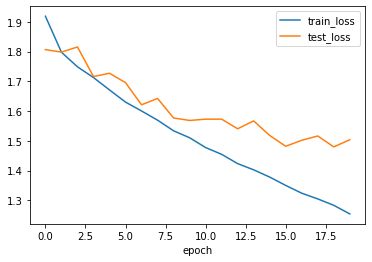

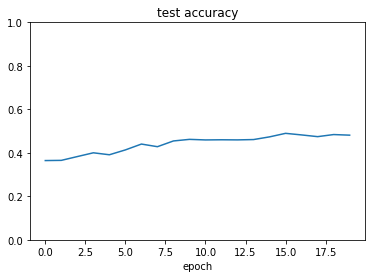

In [16]:
print(num_epochs)
# print(history)
plt.figure()
plt.plot(range(len(train_loss_list)), train_loss_list, label='train_loss')
plt.plot(range(len(val_loss_list)), val_loss_list, label='test_loss')
plt.xlabel('epoch')
plt.legend()
plt.savefig('linear.png')

plt.figure()
plt.plot(range(len(val_acc_list)), val_acc_list)
plt.ylim(0, 1)
plt.title('test accuracy')
plt.xlabel('epoch')
plt.savefig('linear.png')
print(val_acc_list)
print(train_loss_list)
print(val_loss_list)